In [39]:
cd "F:\Knowledge\ML\courses_ML\Content\My_codes\covid_19_EDA"

F:\Knowledge\ML\courses_ML\Content\My_codes\covid_19_EDA


In [40]:
#data download:https://dashboard.kerala.gov.in/dailyreporting-view-public-districtwise.php

In [41]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import math
import random
from datetime import timedelta

In [42]:
import plotly as py
py.offline.init_notebook_mode(connected = True)

In [43]:
#color pallette
cnf = '#393e46'
dth = '#ff2e63'
rec = '#21bf73'
act = '#fe9801'

# Date wise Reporting(Last 30 days)
DATA AS ON 20/6/2021
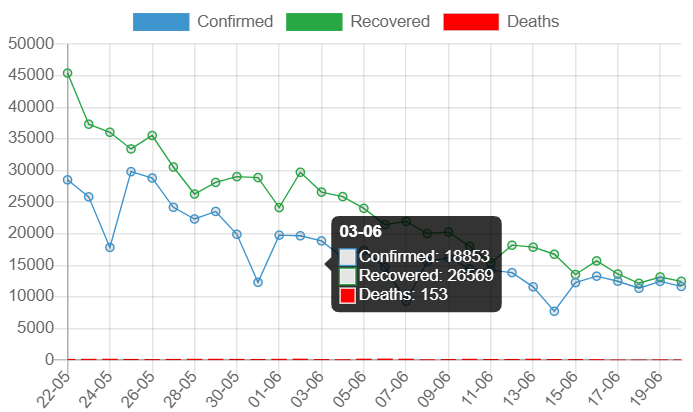

In [44]:
dashboard_date_wise = pd.read_csv('Data/Kerala_COVID-19 Statistics_summary_date_wise.csv', parse_dates=['Date'])

In [45]:
dashboard_date_wise.head()

,Date,Confirmed,Recovered,Active,Death
0,2020-01-30,1,0,1,0
1,2020-02-02,1,0,2,0
2,2020-02-03,1,0,3,0
3,2020-02-16,0,2,1,0
4,2020-02-16,0,1,0,0


In [46]:
dashboard_date_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       470 non-null    datetime64[ns]
 1   Confirmed  470 non-null    int64         
 2   Recovered  470 non-null    int64         
 3   Active     470 non-null    int64         
 4   Death      470 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 18.5 KB


In [47]:
dashboard_date_wise.isnull().sum()

Date         0
Confirmed    0
Recovered    0
Active       0
Death        0
dtype: int64

In [48]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dashboard_date_wise['Date'], y = dashboard_date_wise['Confirmed']))
fig.show()

In [49]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dashboard_date_wise['Date'], y = dashboard_date_wise['Confirmed'], mode = 'lines+markers', name = 'Confirmed', line = dict(color = "Orange", width = 2)))
fig.update_layout(title = 'Worldwide Covid-19 Cases', xaxis_tickfont_size = 14, yaxis = dict(title = 'Number of Cases'))

#fig.show()
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dashboard_date_wise['Date'], y = dashboard_date_wise['Confirmed'], mode = 'lines+markers', name = 'Confirmed', line = dict(color = "Orange", width = 2)))
fig.add_trace(go.Scatter(x =dashboard_date_wise['Date'], y = dashboard_date_wise['Recovered'], mode = 'lines+markers', name = 'Recovered', line = dict(color = "Green", width = 2)))
fig.add_trace(go.Scatter(x = dashboard_date_wise['Date'], y = dashboard_date_wise['Death'], mode = 'lines+markers', name = 'Deaths', line = dict(color = "Red", width = 2)))
fig.update_layout(title = 'Worldwide Covid-19 Cases', xaxis_tickfont_size = 14, yaxis = dict(title = 'Number of Cases'))

#fig.show()
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

# Cumulative Summary of Kerala
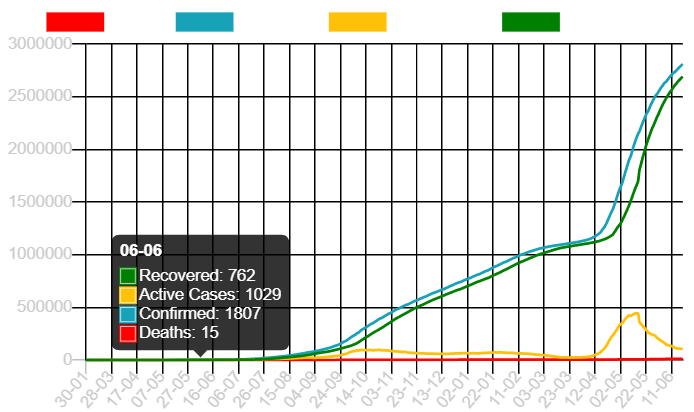

In [51]:
dashboard_date_wise.tail()

,Date,Confirmed,Recovered,Active,Death
465,2021-06-16,13270,15689,109794,147
466,2021-06-17,12469,13614,108560,88
467,2021-06-18,11361,12147,107682,90
468,2021-06-19,12443,13145,106861,115
469,2021-06-20,11647,12459,105936,112


In [52]:
temp = dashboard_date_wise.groupby('Date')['Confirmed', 'Death', 'Recovered', 'Active'].sum()
temp.tail(5)

<ipython-input-52-d572b70661e9>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Confirmed,Death,Recovered,Active
Date,,,,
2021-06-16,13270,147,15689,109794
2021-06-17,12469,88,13614,108560
2021-06-18,11361,90,12147,107682
2021-06-19,12443,115,13145,106861
2021-06-20,11647,112,12459,105936


In [53]:
temp =temp.cumsum().reset_index()
temp.tail(5)

,Date,Confirmed,Death,Recovered,Active
463,2021-06-16,2761474,11655,2639593,29741151
464,2021-06-17,2773943,11743,2653207,29849711
465,2021-06-18,2785304,11833,2665354,29957393
466,2021-06-19,2797747,11948,2678499,30064254
467,2021-06-20,2809394,12060,2690958,30170190


In [54]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x = temp['Date'], y = temp['Confirmed'], mode = 'lines+markers', name = 'Confirmed', line = dict(color = "Orange", width = 2)))
fig2.add_trace(go.Scatter(x =temp['Date'], y = temp['Recovered'], mode = 'lines+markers', name = 'Recovered', line = dict(color = "Green", width = 2)))
fig2.add_trace(go.Scatter(x = temp['Date'], y = temp['Death'], mode = 'lines+markers', name = 'Deaths', line = dict(color = "Red", width = 2)))
fig2.add_trace(go.Scatter(x = temp['Date'], y = temp['Confirmed']-temp['Recovered'], mode = 'lines+markers', name = 'Active', line = dict(color = "Blue", width = 2)))
fig2.update_layout(title = 'Worldwide Covid-19 Cases', xaxis_tickfont_size = 14, yaxis = dict(title = 'Number of Cases'))

#fig.show()
fig2.update_layout(xaxis_rangeslider_visible=True)
fig2.show()

In [55]:
temp = dashboard_date_wise.groupby('Date')['Confirmed', 'Death', 'Recovered', 'Active'].sum().reset_index()
#temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop = True)

tm = temp.melt(id_vars = 'Date', value_vars = ['Active','Recovered'])
fig = px.treemap(tm, path = ['variable'], values = 'value', height = 250, width = 800, color_discrete_sequence=[act, rec])

fig.data[0].textinfo = 'label+text+value'
fig.show()

<ipython-input-55-1a0afa08b69b>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

